In [1]:
%load_ext autoreload
%autoreload 2

import pyleoclim.api as pyleo
import pandas as pd
import numpy as np
from pyleoclim import examples

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

In [2]:
soi_data = examples.load_dataset('soi', skiprows=1)
soi_data['Date'] = pd.to_datetime(soi_data['Date'], format='%Y%m')
nt = len(soi_data)
to = np.linspace(1951, 2020-1/12, nt)
Xo = soi_data['Value'].values
ts = pyleo.Series(time=to, value=Xo, time_name='Year', time_unit='AD', value_name='SOI', value_unit='K')
psd_mtm = ts.spectral(method='mtm')
psd_wwz = ts.spectral(settings={'nMC': 0})
scal_wwz = ts.wavelet(settings={'nMC': 0})

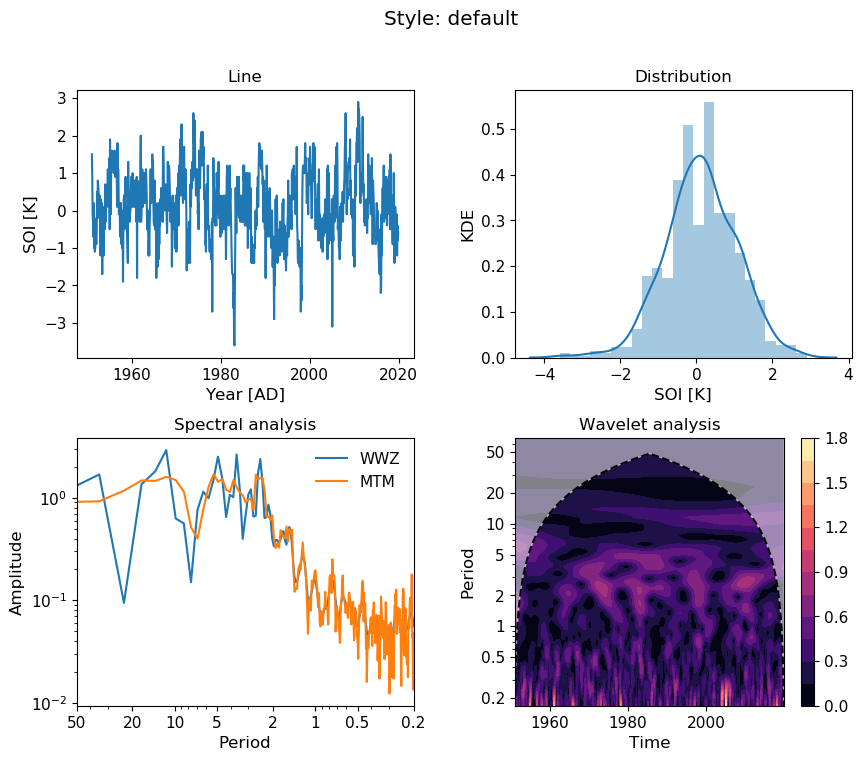

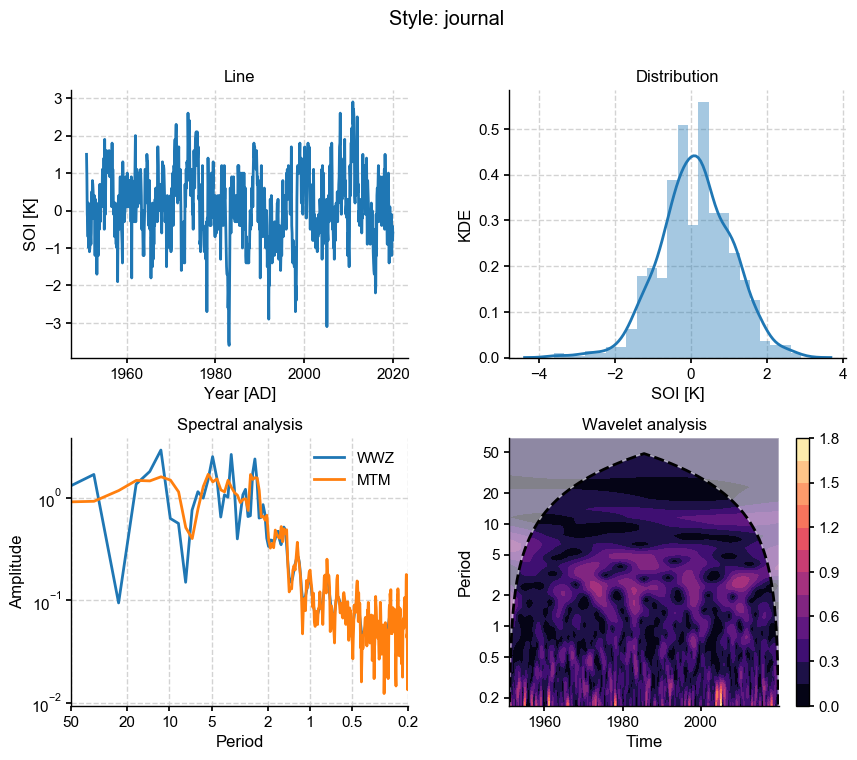

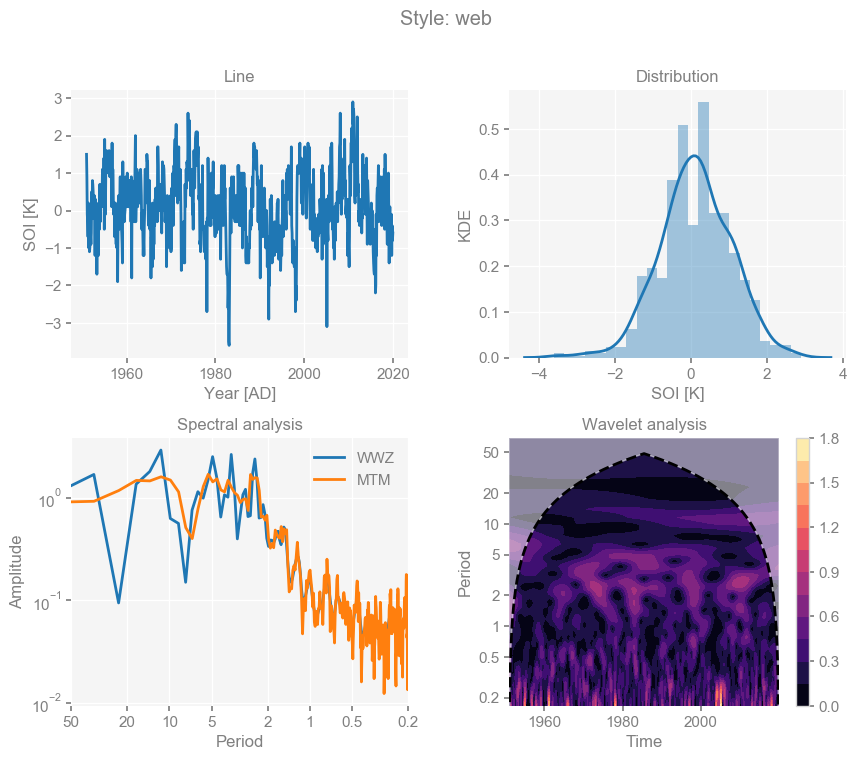

In [63]:
for style in ['default', 'journal', 'web']:
    pyleo.visualization.set_style(style)
    
    fig = plt.figure(figsize=[10, 8])
    gs = gridspec.GridSpec(2, 2)
    gs.update(wspace=0.3, hspace=0.3) 
    
    ax1 = plt.subplot(gs[0, 0])
    ax1 = ts.plot(title='Line', ax=ax1)
    
    ax2 = plt.subplot(gs[0, 1])
    ax2 = ts.distplot(title='Distribution', ax=ax2)
    
    ax3 = plt.subplot(gs[1, 0])
    ax3 = psd_wwz.plot(title='Spectral analysis', ax=ax3, label='WWZ')
    ax3 = psd_mtm.plot(ax=ax3, label='MTM')
    
    ax4 = plt.subplot(gs[1, 1])
    ax4 = scal_wwz.plot(title='Wavelet analysis', ax=ax4)
    fig.suptitle(f'Style: {style}')
    pyleo.visualization.showfig(fig)

Figure saved at: "figs/exp001/ts_grid.pdf"


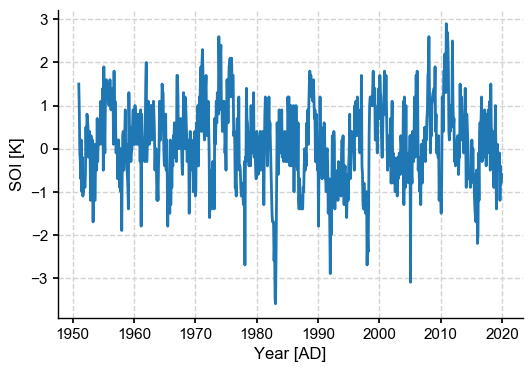

Figure saved at: "figs/exp001/ts_nogrid.pdf"


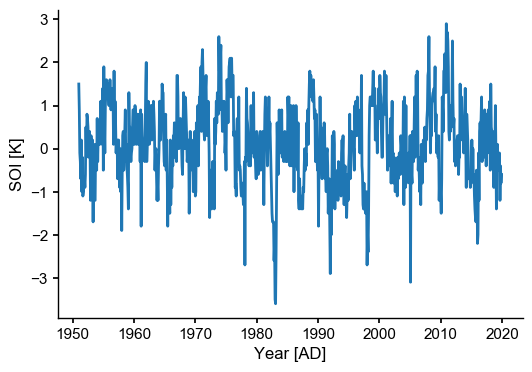

In [68]:
for suffix in ['grid', 'nogrid']:
    pyleo.visualization.set_style(f'journal_{suffix}')
    fig, ax = ts.plot(figsize=[6, 4], savefig_settings={'path': f'./figs/exp001/ts_{suffix}.pdf'})
    pyleo.visualization.showfig(fig)

Figure saved at: "figs/exp001/wavelet_spines.pdf"


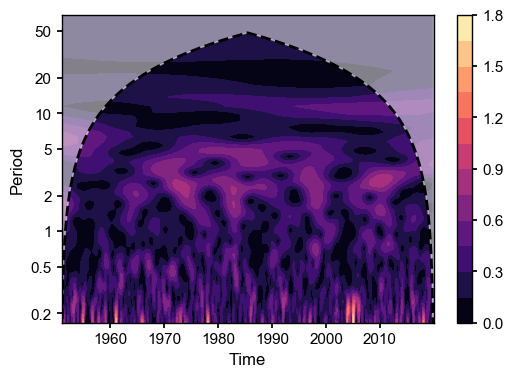

Figure saved at: "figs/exp001/wavelet_nospines.pdf"


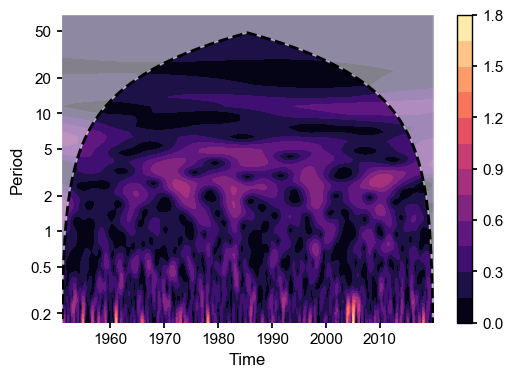

In [67]:
for suffix in ['spines', 'nospines']:
    pyleo.visualization.set_style(f'journal_{suffix}')
    fig, ax = scal_wwz.plot(figsize=[6, 4], savefig_settings={'path': f'./figs/exp001/wavelet_{suffix}.pdf'})
    pyleo.visualization.showfig(fig)